<h1>Iris Flower Classification using Regularized Logistic Regression</h1>
<p>We will build a one v/s all logistic regression classifier that classifies an Iris flower into 3 classes viz. <i>setosa</i>, <i>virginica</i>, and <i>versicolor</i>.</p>

<h3>Importing packages</h3>
<p>To build our own classifier, we require the following packages :</p>
<ul>
    <li>NumPy, for vectorized calculations</li>
    <li>Pandas for reading the dataset</li>
    <li>Matplotlib, for data visualization</li>
    <li>Scipy's fmin_tnc function, for our optimization algorithm</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc

<h3>Fetching the dataset</h3>
<p>We will fetch the Iris dataset, found from Kaggle, using the Pandas's read_csv function and store the resultant DataFrame into a variable, and print the first five entries</p>
<p>We see that there are in total six columns as follows :-</p>
<ol>
    <li>Id (dropped as it is of no use)</li>
    <li>SepalLengthCm : The length of the sepal (in cm)</li>
    <li>SepalWidthCm : The width of the sepal (in cm)</li>
    <li>PetalLengthCm : The length of the petal (in cm)</li>
    <li>PetalWidthCm : The width of the petal (in cm)</li>
</ol>

In [2]:
dataset = pd.read_csv('iris.csv').drop(['Id'], axis=1)
print(dataset.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<h3>Dividing the dataset based on the classes</h3>
<p>From the dataset, we know that there are three values of flower species. So, we separate the data of the three types of Iris flowers and moreover, we again separate them based on sepal and petal measurements.</p>

In [3]:
iris_setosa = dataset.loc[dataset['Species'] == 'Iris-setosa']
iris_virginica = dataset.loc[dataset['Species'] == 'Iris-virginica']
iris_versicolor = dataset.loc[dataset['Species'] == 'Iris-versicolor']

sepal_iris_setosa = iris_setosa[['SepalLengthCm', 'SepalWidthCm', 'Species']]
petal_iris_setosa = iris_setosa[['PetalLengthCm', 'PetalWidthCm', 'Species']]

sepal_iris_virginica = iris_virginica[['SepalLengthCm', 'SepalWidthCm', 'Species']]
petal_iris_virginica = iris_virginica[['PetalLengthCm', 'PetalWidthCm', 'Species']]

sepal_iris_versicolor = iris_versicolor[['SepalLengthCm', 'SepalWidthCm', 'Species']]
petal_iris_versicolor = iris_versicolor[['PetalLengthCm', 'PetalWidthCm', 'Species']]

<h3>Visualizing the data</h3>
<p>We make a scatter plot between sepal length and sepal width of the Iris flowers, as weel as a scatter plot between petal length and petal width of the Iris flowers.</p>

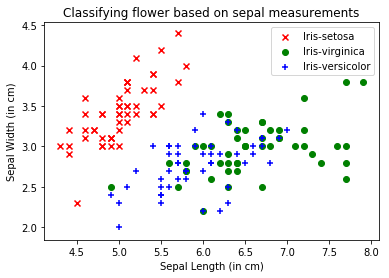

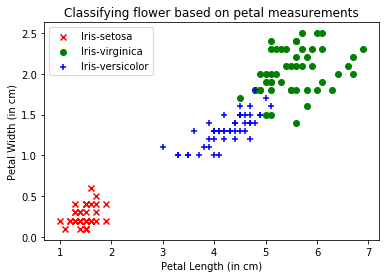

In [4]:
plt.scatter(sepal_iris_setosa['SepalLengthCm'], sepal_iris_setosa['SepalWidthCm'], color="red", marker="x")
plt.scatter(sepal_iris_virginica['SepalLengthCm'], sepal_iris_virginica['SepalWidthCm'], color="green", marker="o")
plt.scatter(sepal_iris_versicolor['SepalLengthCm'], sepal_iris_versicolor['SepalWidthCm'], color="blue", marker="+")
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.title('Classifying flower based on sepal measurements')
plt.legend(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])
plt.show()

plt.scatter(petal_iris_setosa['PetalLengthCm'], petal_iris_setosa['PetalWidthCm'], color="red", marker="x")
plt.scatter(petal_iris_virginica['PetalLengthCm'], petal_iris_virginica['PetalWidthCm'], color="green", marker="o")
plt.scatter(petal_iris_versicolor['PetalLengthCm'], petal_iris_versicolor['PetalWidthCm'], color="blue", marker="+")
plt.xlabel('Petal Length (in cm)')
plt.ylabel('Petal Width (in cm)')
plt.title('Classifying flower based on petal measurements')
plt.legend(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])
plt.show()

<h3>Feature Extraction</h3>
<p>To correctly classify the flowers, we need to extract the 'SepalLengthCm', SepalWidthCm', 'PetalLengthCm' and 'PetalWidthCm' features from the dataset. First of all, we choose the mentioned features and store it in 'features' variable and then, choose the 'Species' column from the dataset and store it in the 'labels' variable</p>
Secondly, we need to add ones to the feature index number 0 for all training samples as this allows us to do matrix operations with theta and x, making the two vectors 'theta' and 'x(i)' match each other element-wise i.e have the same number of elements.</p>
<p>Finally, we also need to assign numeric values for our labels and not string values. So, we replace all the values that are equal to 'Iris-setosa' by 0, 'Iris-virginica' by 1 and 'Iris-versicolor' by 2. In this way, it becomes easy to calcuate the cost, error and optimized the theta parameters.</p>

In [5]:
dataset.loc[dataset['Species'] == 'Iris-setosa', 'Species'] = 0
dataset.loc[dataset['Species'] == 'Iris-virginica', 'Species'] = 1
dataset.loc[dataset['Species'] == 'Iris-versicolor', 'Species'] = 2
labels = dataset['Species'].values
features = dataset.drop(['Species'], axis=1).values
features = np.column_stack((np.ones(features.shape[0]), features))

<h3>Cost function and gradient</h3>
<p>Now we will implement code to compute the cost function and gradient for regularized logistic regression.
Recall that the regularized cost function in logistic regression is :</p>
<img src="https://camo.githubusercontent.com/4bce1643fa5b5d3f99e28aceb8afec7112bcec23/687474703a2f2f7777772e686f6c65686f7573652e6f72672f6d6c636c6173732f30375f526567756c6172697a6174696f6e5f66696c65732f496d6167652532305b355d2e706e67" />
<p>The gradient of the cost function is a vector where the jth element is defined as follows:</p>
<img src="https://camo.githubusercontent.com/9467142575f2dffcea3cfe44a625da17b8251ed4/68747470733a2f2f69302e77702e636f6d2f7777772e736369656e636570726f672e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f30312f6772616469656e745f726567756c6172697a65642e706e673f726573697a653d363030253243313733" />

In [6]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, x, y):
    m = y.shape[0]
    h = sigmoid_function(np.dot(x, theta))
    return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient(theta, x, y):
    m = y.shape[0]
    h = sigmoid_function(np.dot(x, theta))
    error = h - y
    return (1 / m) * np.dot(x.T, error)

def reg_cost_function(theta, x, y, lamda):
    m = y.shape[0]
    cost = cost_function(theta, x, y)
    reg_term = (lamda / (2 * m)) * np.sum(theta[1:] ** 2)
    cost += reg_term
    return cost

def reg_gradient(theta, x, y, lamda):
    m = y.shape[0]
    grad = gradient(theta, x, y)
    grad[1:] += (lamda / m) * theta[1:]
    return grad

<h3>Learning parameters for multi-class classification</h3>
<p>Now, we need to optimize the theta values as fast as possible. To do that from scratch is difficult. Instead, we borrow that functionality from Scipy library. This library contains various advance optimization algorithms under the 'optimize' submodule.</p>
<p>We will be using the 'fmin_tnc() function which takes the following parameters :</p>
<ol>
    <li>func : The name of the user-defined cost function (in our case, cost)</li>
    <li>x0 : Initial values of theta</li>
    <li>fprime : The name of the user-defined gradient function (in our case, gradient)</li>
    <li>args : The tuple consisting of features (x), labels (y) and lamda (regularization parameter)</li>
</ol>
<p>This function returns the optimized values of theta in it's first element.</p>
<p>In this part, we will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the K classes in our dataset.</p>
<p>In particular, our code will return all the classifier parameters in a matrix Θ ∈ R<sup>K×(N+1)</sup> , where each row of Θ corresponds to the learned logistic regression parameters for one class. We do this with a “for”-loop from 1 to K, training each classifier independently.</p>
<p>When training the classifier for class k ∈ {1,...,K}, you will want a m-dimensional vector of labels y, where y<sub>j</sub> ∈ 0,1 indicates whether the j-th training instance belongs to class k (y<sub>j</sub> = 1), or if it belongs to a different class (y<sub>j</sub> = 0).</p>

In [7]:
def fit(x, y, num_classes):
    lamda = 1
    theta = np.zeros((x.shape[1], num_classes))
    for i_class in range(num_classes):
        labels = np.array(y == i_class).astype(int)
        init_theta = theta[:,i_class]
        result = fmin_tnc(func=reg_cost_function, x0=init_theta, fprime=reg_gradient, args=(x,labels,lamda))
        theta[:,i_class] = result[0]
    return theta

theta = fit(features, labels, 3)

<h3>Accuracy of our trained classifier</h3>
<p>This function computes the “probability” that it belongs to each class using the trained logistic regression classifiers. The one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (1, 2,..., or K) as the prediction for the input example.</p>

In [8]:
def calc_accuracy(theta, x, y):
    probabilities = np.dot(x, theta)
    predictions = np.argmax(probabilities, axis=1)
    accuracy = np.mean(predictions == y) * 100
    return accuracy

print("Accuracy (in %) : ", calc_accuracy(theta, features, labels))

Accuracy (in %) :  95.33333333333334
